## Hawaii Climate and Precipitation Analysis

Use SQL ALchemy to connect to a SQLite database to extract information about precipitation and temperature for a variety of weather observatories in Hawaii with data from 2010-2017.

In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

import datetime as dt

### Reflect Tables into SQLAlchemy ORM


In [2]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [3]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [4]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [5]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [6]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [7]:
# Create our session (link) from Python to the DB
session = Session(engine)

### Precipitation Analysis

In [8]:
#Inspect columns
inspector = inspect(engine)
inspector.get_table_names()

columns_m = inspector.get_columns("measurement")
for column in columns_m:
    print(column["name"], column["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
#Design a query to retrieve the last 12 months of precipitation data using only 'date' and 'prcp'
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
latest_date
#earliest_date = session.query(Measurement.date).order_by(Measurement.date.asc()).first()
#earliest_date
#Range of data available: 01-01-2010 to 08-23-2017

('2017-08-23')

In [10]:
pcp_query = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date.between('2016-08-23','2017-08-23')).\
    order_by(Measurement.date).all()
pcp_query

[('2016-08-23', 0.0),
 ('2016-08-23', 0.15),
 ('2016-08-23', 0.05),
 ('2016-08-23', None),
 ('2016-08-23', 0.02),
 ('2016-08-23', 1.79),
 ('2016-08-23', 0.7),
 ('2016-08-24', 0.08),
 ('2016-08-24', 2.15),
 ('2016-08-24', 2.28),
 ('2016-08-24', None),
 ('2016-08-24', 1.22),
 ('2016-08-24', 2.15),
 ('2016-08-24', 1.45),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.0),
 ('2016-08-25', 0.21),
 ('2016-08-25', 0.06),
 ('2016-08-25', 0.11),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.03),
 ('2016-08-26', 0.02),
 ('2016-08-26', 0.04),
 ('2016-08-26', 0.0),
 ('2016-08-26', 0.01),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.18),
 ('2016-08-27', 0.02),
 ('2016-08-27', 0.0),
 ('2016-08-27', 0.12),
 ('2016-08-27', None),
 ('2016-08-28', 0.01),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.14),
 ('2016-08-28', 0.6),
 ('2016-08-28', 2.07),
 ('2016-08-29', 0.0),
 ('2016-08-29', 0.17),
 ('2016-08-29', 0.04),
 ('2016-08-29', None),
 ('2016-08-29', 0.0),

In [11]:
##Load the query results into a Pandas DataFrame and set the index to the date column.
df = pd.DataFrame(pcp_query, columns=['date', 'precipitation'])
pcp_df = df.fillna(0.0)
pcp_df.set_index('date', inplace=False)
pcp_df.head()

,date,precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,0.00
4,2016-08-23,0.02


In [12]:
#Sort the DataFrame values by 'date'.
pcp_sorted_df = pcp_df.sort_values('date')
pcp_sorted_df.head()

,date,precipitation
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,0.00
4,2016-08-23,0.02


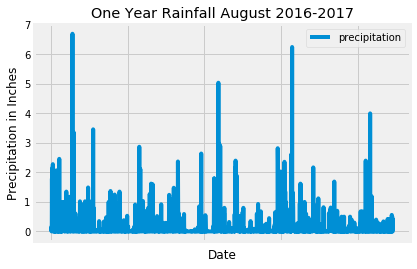

In [13]:
#Plot the results using the DataFrame 'plot' method
pcp_sorted_df.plot(x='date', y='precipitation')
plt.xlabel("Date")
plt.ylabel("Precipitation in Inches")
plt.title("One Year Rainfall August 2016-2017")
plt.show()

In [14]:
#Use Pandas to print the summary statistics for the precipitation data.
pcp_sorted_df.describe()

,precipitation
count,2230.000000
mean,0.160664
std,0.442067
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,6.700000


### Station Analysis

In [15]:
#Inspect columns
inspector = inspect(engine)
inspector.get_table_names()

columns_s = inspector.get_columns("station")
for column in columns_s:
    print(column["name"], column["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [16]:
#Design a query to calculate the total number of stations.
total_stations = session.query(Station.station).count()
total_stations

9

In [17]:
#Design a query to find the most active stations.
session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [18]:
# Most active station
most_active = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).first()
print("The most active station is: ", most_active[0])

The most active station is:  USC00519281


In [19]:
#Design a query to retrieve the last 12 months of temperature observation data (tobs).
#Filter by the station with the highest number of observations.
tobs_query = session.query(Measurement.tobs, Measurement.date).\
    filter(Measurement.date.between('2016-08-23','2017-08-23')).\
    filter(Measurement.station == 'USC00519281').all()
tobs_query

[(77.0, '2016-08-23'),
 (77.0, '2016-08-24'),
 (80.0, '2016-08-25'),
 (80.0, '2016-08-26'),
 (75.0, '2016-08-27'),
 (73.0, '2016-08-28'),
 (78.0, '2016-08-29'),
 (77.0, '2016-08-30'),
 (78.0, '2016-08-31'),
 (80.0, '2016-09-01'),
 (80.0, '2016-09-02'),
 (78.0, '2016-09-03'),
 (78.0, '2016-09-04'),
 (78.0, '2016-09-05'),
 (73.0, '2016-09-06'),
 (74.0, '2016-09-07'),
 (80.0, '2016-09-08'),
 (79.0, '2016-09-09'),
 (77.0, '2016-09-10'),
 (80.0, '2016-09-11'),
 (76.0, '2016-09-12'),
 (79.0, '2016-09-13'),
 (75.0, '2016-09-14'),
 (79.0, '2016-09-15'),
 (78.0, '2016-09-16'),
 (79.0, '2016-09-17'),
 (78.0, '2016-09-18'),
 (78.0, '2016-09-19'),
 (76.0, '2016-09-20'),
 (74.0, '2016-09-21'),
 (77.0, '2016-09-22'),
 (78.0, '2016-09-23'),
 (79.0, '2016-09-24'),
 (79.0, '2016-09-25'),
 (77.0, '2016-09-26'),
 (80.0, '2016-09-27'),
 (78.0, '2016-09-28'),
 (78.0, '2016-09-29'),
 (78.0, '2016-09-30'),
 (77.0, '2016-10-01'),
 (79.0, '2016-10-02'),
 (79.0, '2016-10-03'),
 (79.0, '2016-10-04'),
 (79.0, '20

In [20]:
#Plot the results as a histogram with `bins=12`.
tobs_df = pd.DataFrame(tobs_query)
tobs_df = tobs_df.fillna(0)
tobs_df.head()

,tobs,date
0,77.0,2016-08-23
1,77.0,2016-08-24
2,80.0,2016-08-25
3,80.0,2016-08-26
4,75.0,2016-08-27


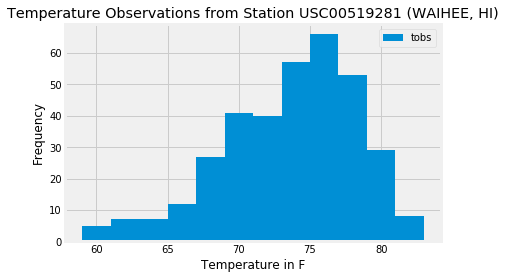

In [21]:
tobs_df.plot.hist(bins=12)
plt.xlabel("Temperature in F")
plt.title("Temperature Observations from Station USC00519281 (WAIHEE, HI)")
plt.show()

Calculate a minimum temperature, the average temperature, and the max temperature for a given start or start-end range.
When given the start only, calculate TMIN, TAVG, and TMAX for all dates greater than and equal to the start date.
Hint: You may want to look into how to create a default value for your route variable.
When given the start and the end date, calculate the TMIN, TAVG, and TMAX for dates between the start and end date inclusive.


In [26]:
# Test flask function using datetime (which we really did not go over in class)

start = '2016-05-24'
end = '2016-05-29'

def start_end_temp(start,end):
    start_date= dt.datetime.strptime(start, '%Y-%m-%d')
    end_date= dt.datetime.strptime(end,'%Y-%m-%d')
    start_end_query = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
    mystart = {}
    for row in start_end_query:
        mystart["Minimum Temperature: "] = row[0]
        mystart["Average Temperature: "] = row[1]
        mystart["Maximum Temperature: "] = row[2]

    return(mystart)

start_end_temp(start,end)

{'Minimum Temperature: ': 69.0,
 'Average Temperature: ': 75.75862068965517,
 'Maximum Temperature: ': 81.0}